In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import random
import statistics
import pathlib
import sys
import math
import matplotlib.pyplot as plt

# Historical data (1900-2020)

In [2]:
Data = pd.read_excel (io = r'Data_input.xlsx', sheet_name="Input",nrows=151)
Data.tail()

,Year,Cement production,Clinker ratio,Gypsum ratio,Slag ratio,Fly ash ratio,Limestone ratio,Natural pozzolana ratio,CKD generation rate,Proportion of landfilled CKD,...,Electricity for fly ash,Electricity emission factor,Emission factor for aggregate production,Emission factor for mixing and batching,Emission factor for on-site placement,Transportation of cement,Transportation of mineral admixtures,Transportation of virgin aggregate,Transportation of buried aggregate,Transportation of recycled aggregate
146,2046,4974.447185,0.72,0.053415,0.053571,0.061817,0.091235,0.019962,0.06,0.8,...,119.444444,0.000491,0.003176,0.001177,0.00784,0.008892,0.002356,0.004446,0.004446,0
147,2047,5004.233615,0.72,0.053415,0.053571,0.061817,0.091235,0.019962,0.06,0.8,...,119.444444,0.000491,0.003176,0.001177,0.00784,0.008892,0.002356,0.004446,0.004446,0
148,2048,5034.020045,0.72,0.053415,0.053571,0.061817,0.091235,0.019962,0.06,0.8,...,119.444444,0.000491,0.003176,0.001177,0.00784,0.008892,0.002356,0.004446,0.004446,0
149,2049,5063.806475,0.72,0.053415,0.053571,0.061817,0.091235,0.019962,0.06,0.8,...,119.444444,0.000491,0.003176,0.001177,0.00784,0.008892,0.002356,0.004446,0.004446,0
150,2050,5093.592906,0.72,0.053415,0.053571,0.061817,0.091235,0.019962,0.06,0.8,...,119.444444,0.000491,0.003176,0.001177,0.00784,0.008892,0.002356,0.004446,0.004446,0


In [3]:
# cement mixture
cement_pro  = Data["Cement production"]
clinker_cem = cement_pro * Data["Clinker ratio"]
gypsum_cem  = cement_pro * Data["Gypsum ratio"]
slag_cem    = cement_pro * Data["Slag ratio"]
ash_cem     = cement_pro * Data["Fly ash ratio"]
lime_cem    = cement_pro * Data["Limestone ratio"]
pozzo_cem   = cement_pro * Data["Natural pozzolana ratio"]
cement_mix  = pd.DataFrame()
cement_mix  = pd.concat([clinker_cem,gypsum_cem,slag_cem,ash_cem,lime_cem,pozzo_cem],axis=1)
cement_mix  = cement_mix.rename(columns={0:"Clinker",1:"Gypsum",2:"Slag",3:"Fly ash",
                                         4:"Limestone",5:"Pozzolana"})

# ckd
CKD      = clinker_cem * Data["CKD generation rate"]
land_CKD = CKD * Data["Proportion of landfilled CKD"]
CKD_mix  = pd.DataFrame()
CKD_mix  = pd.concat([CKD,land_CKD],axis=1)
CKD_mix  = CKD_mix.rename(columns={0:"CKD generation",1:"Landfilled CKD"})

# concrete mixture
cement_con = cement_pro * Data["Cement concrete share"]
water_con  = cement_con * Data["Water used in concrete"]
fine_con   = cement_con * Data["Fine aggregates used in concrete"]
coarse_con = cement_con * Data["Coarse aggregates used in concrete"]
slag_con   = cement_con * Data["Slag used in concrete"]
ash_con    = cement_con * Data["Fly ash used in concrete"]
concrete_mix = pd.DataFrame()
concrete_mix = pd.concat([cement_con,water_con,fine_con,coarse_con,slag_con,ash_con],axis=1)
concrete_mix = concrete_mix.rename(columns={0:"Cement",1:"Water",2:"Fine aggregates",
                                            3:"Coarse aggregates",4:"Slag",5:"Fly ash"})

# mortar mixture
cement_mor = cement_pro * Data["Cement mortar share"]
water_mor  = cement_mor * Data["Water used in mortar"]
fine_mor   = cement_mor * Data["Fine aggregates used in mortar"]
coarse_mor = cement_mor * Data["Coarse aggregates used in mortar"]
slag_mor   = cement_mor * Data["Slag used in mortar"]
ash_mor    = cement_mor * Data["Fly ash used in mortar"]
mortar_mix = pd.DataFrame()
mortar_mix = pd.concat([cement_mor,water_mor,fine_mor,coarse_mor,slag_mor,ash_mor],axis=1)
mortar_mix = mortar_mix.rename(columns={0:"Cement",1:"Water",2:"Fine aggregates",
                                        3:"Coarse aggregates",4:"Slag",5:"Fly ash"})

# manufacturing loss
fine_con_loss   = fine_con   / Data["Manufacturing yield"] - fine_con
coarse_con_loss = coarse_con / Data["Manufacturing yield"] - coarse_con
fine_mor_loss   = fine_mor   / Data["Manufacturing yield"] - fine_mor
manloss_mix = pd.DataFrame()
manloss_mix = pd.concat([fine_con_loss,coarse_con_loss,fine_mor_loss],axis=1)
manloss_mix = manloss_mix.rename(columns={0:"Fine aggregate loss in concrete manufacturing",
                                          1:"Coarse aggregate loss in concrete manufacturing",
                                          2:"Fine aggregate loss in mortar manufacturing"})

# concrete and mortar production
pro_con = cement_con + water_con + fine_con + coarse_con + slag_con + ash_con
pro_mor = cement_mor + water_mor + fine_mor + coarse_mor + slag_mor + ash_mor
production_mix = pd.DataFrame()
production_mix = pd.concat([pro_con,pro_mor],axis=1)
production_mix = production_mix.rename(columns={0:"Concrete",1:"Mortar"})


# construction loss
concrete_loss = pro_con * (1-Data["Construction yield"])
mortar_loss   = pro_mor * (1-Data["Construction yield"])
conloss_mix   = pd.DataFrame()
conloss_mix   = pd.concat([concrete_loss,mortar_loss],axis=1)
conloss_mix   = conloss_mix.rename(columns={0:"Concrete loss",1:"Mortar loss"})

# concrete and mortar inflow
in_con = pro_con - concrete_loss
in_mor = pro_mor - mortar_loss
inflow_mix = pd.DataFrame()
inflow_mix = pd.concat([in_con,in_mor],axis=1)
inflow_mix = inflow_mix.rename(columns={0:"Concrete",1:"Mortar"})

# concrete inflow by end-uses
in_con_res  = in_con * Data["Res share"]
in_con_nonr = in_con * Data["NonR share"]
in_con_civ  = in_con * Data["Civ share"]

# moratr inflow by end-uses
in_mor_res  = in_mor * Data["Res share"]
in_mor_nonr = in_mor * Data["NonR share"]
in_mor_civ  = in_mor * Data["Civ share"]

# inflow matrix
in_con_matrix = pd.DataFrame()
in_con_matrix = pd.concat([in_con_res,in_con_nonr,in_con_civ],axis=1)

in_mor_matrix = pd.DataFrame()
in_mor_matrix = pd.concat([in_mor_res,in_mor_nonr,in_mor_civ],axis=1)

# lifetime matrix
life_matrix = pd.DataFrame()
life_matrix = pd.concat([Data["Res life"],Data["NonR life"],Data["Civ life"]],axis=1)

##############################################################################
# inflow-driven model
##############################################################################

ot_con_matrix = pd.DataFrame()
ot_mor_matrix = pd.DataFrame()

for i in range(0,len(in_con_matrix.columns)):
    year_complete = np.arange(1900,1901)
    ot_con_extended = np.repeat(0,len(year_complete))
    ot_mor_extended = np.repeat(0,len(year_complete))
    
    for k in range(1901,2051):
        in_con_extended = in_con_matrix.iloc[0:len(year_complete),i]
        in_mor_extended = in_mor_matrix.iloc[0:len(year_complete),i]
        life_extended   = life_matrix.iloc[0:len(year_complete),i]
       
        ot_con_list = in_con_extended * (norm.pdf(k-year_complete,life_extended,life_extended*0.28))
        ot_con      = sum(ot_con_list)
        ot_con_extended = np.append(ot_con_extended,ot_con)
        
        ot_mor_list = in_mor_extended * (norm.pdf(k-year_complete,life_extended,life_extended*0.28))
        ot_mor      = sum(ot_mor_list)
        ot_mor_extended = np.append(ot_mor_extended,ot_mor)
        
        year_complete = np.append(year_complete,k)
        
    ot_con_matrix = pd.concat([ot_con_matrix, pd.Series(ot_con_extended)], axis = 1, ignore_index = True)
    ot_mor_matrix = pd.concat([ot_mor_matrix, pd.Series(ot_mor_extended)], axis = 1, ignore_index = True)
    
NAS_con_matrix = in_con_matrix - ot_con_matrix
NAS_mor_matrix = in_mor_matrix - ot_mor_matrix
st_con_matrix  = NAS_con_matrix.cumsum()
st_mor_matrix  = NAS_mor_matrix.cumsum()

in_con_matrix = in_con_matrix.rename(columns={0:"Residential buildings",
                                              1:"Non-residential buildings",
                                              2:"Civil engineering"})                   
ot_con_matrix = ot_con_matrix.rename(columns={0:"Residential buildings",
                                              1:"Non-residential buildings",
                                              2:"Civil engineering"})
st_con_matrix = st_con_matrix.rename(columns={0:"Residential buildings",
                                              1:"Non-residential buildings",
                                              2:"Civil engineering"})

in_mor_matrix = in_mor_matrix.rename(columns={0:"Residential buildings",
                                              1:"Non-residential buildings",
                                              2:"Civil engineering"})
ot_mor_matrix = ot_mor_matrix.rename(columns={0:"Residential buildings",
                                              1:"Non-residential buildings",
                                              2:"Civil engineering"})
st_mor_matrix = st_mor_matrix.rename(columns={0:"Residential buildings",
                                              1:"Non-residential buildings",
                                              2:"Civil engineering"})

# sum
in_total_matrix = in_con_matrix + in_mor_matrix
ot_total_matrix = ot_con_matrix + ot_mor_matrix
st_total_matrix = st_con_matrix + st_mor_matrix

in_con_total = in_con_matrix.sum(axis=1)
ot_con_total = ot_con_matrix.sum(axis=1)
st_con_total = st_con_matrix.sum(axis=1)
in_mor_total = in_mor_matrix.sum(axis=1)
ot_mor_total = ot_mor_matrix.sum(axis=1)
st_mor_total = st_mor_matrix.sum(axis=1)

in_total = in_con_total + in_mor_total
ot_total = ot_con_total + ot_mor_total
st_total = st_con_total + st_mor_total

# eol management
rec   = ot_total * Data["Recycling rate"]
down  = ot_total * Data["Downcycling rate"]
hiber = ot_total * Data["Hibernating stock rate"]
land  = ot_total - rec - down - hiber
EoL_mix = pd.DataFrame()
EoL_mix = pd.concat([rec,down,hiber,land],axis=1)
EoL_mix = EoL_mix.rename(columns={0:"Recycling",1:"Downcycling",2:"Hibernating stock",3:"Landfill"})

# total aggregate production
pro_fine_con   = fine_con + fine_con_loss
pro_coarse_con = coarse_con + coarse_con_loss
pro_fine_mor   = fine_mor + fine_mor_loss

# natural aggregate production
pro_fine_nat   = pro_fine_con + pro_fine_mor - (rec/2)
pro_coarse_nat = pro_coarse_con - (rec/2)

aggregate_mix = pd.DataFrame()
aggregate_mix = pd.concat([pro_fine_nat,pro_coarse_nat,rec],axis=1)
aggregate_mix = aggregate_mix.rename(columns={0:"Virgin fine aggregate production",
                                              1:"Virgin coarse aggregate production",
                                              2:"Recycled aggregate production"})

# co2 emissions
cem_process  = clinker_cem * Data["Process emission factor"]
cem_thermal  = clinker_cem * Data["Thermal energy"] * Data["Carbon intensity of the fuel mix"]
cem_electric = cement_pro  * Data["Electricity for cement"] * Data["Electricity emission factor"]
agg_pro      = (pro_fine_nat+pro_coarse_nat+rec) * Data["Emission factor for aggregate production"]
slag_pre     = (slag_con + slag_mor) * Data["Electricity for slag"] * Data["Electricity emission factor"]
ash_pre      = (ash_con + ash_mor) * Data["Electricity for fly ash"] * Data["Electricity emission factor"]
adm_pre      = slag_pre + ash_pre
mixing       = (pro_con + pro_mor) * Data["Emission factor for mixing and batching"]
onsite       = (pro_con + pro_mor) * Data["Emission factor for on-site placement"]
tra_cem      = cement_pro * Data["Transportation of cement"]
tra_adm      = (slag_con + slag_mor + ash_con + ash_mor) * Data["Transportation of mineral admixtures"]
tra_agg_nat  = (pro_fine_nat+pro_coarse_nat) * Data["Transportation of virgin aggregate"]
tra_agg_land = land * Data["Transportation of buried aggregate"]
tra_agg_rec  = rec * Data["Transportation of recycled aggregate"]
tra_total    = tra_cem+tra_adm+tra_agg_nat+tra_agg_land+tra_agg_rec

CO2_matrix = pd.DataFrame()
CO2_matrix = pd.concat([cem_process,cem_thermal,cem_electric,agg_pro,adm_pre,mixing,onsite,tra_total],axis=1)
CO2_matrix = CO2_matrix.rename(columns={0:"Cement production (carbonate calcination)",
                                        1:"Cement production (fuel combustion)",
                                        2:"Cement production (electricity use)",
                                        3:"Aggregate production",
                                        4:"Admixture preparation",
                                        5:"Mixing and batching",
                                        6:"On-site placement",
                                        7:"Transportation"})

cement_mix     = cement_mix.rename(index=Data["Year"])
CKD_mix        = CKD_mix.rename(index=Data["Year"])
concrete_mix   = concrete_mix.rename(index=Data["Year"])
mortar_mix     = mortar_mix.rename(index=Data["Year"])
manloss_mix    = manloss_mix.rename(index=Data["Year"])
aggregate_mix  = aggregate_mix.rename(index=Data["Year"])
production_mix = production_mix.rename(index=Data["Year"])
conloss_mix    = conloss_mix.rename(index=Data["Year"])
in_con_matrix  = in_con_matrix.rename(index=Data["Year"])
in_mor_matrix  = in_mor_matrix.rename(index=Data["Year"])
ot_con_matrix  = ot_con_matrix.rename(index=Data["Year"])
ot_mor_matrix  = ot_mor_matrix.rename(index=Data["Year"])
st_con_matrix  = st_con_matrix.rename(index=Data["Year"])
st_mor_matrix  = st_mor_matrix.rename(index=Data["Year"])
in_total_matrix = in_total_matrix.rename(index=Data["Year"])
ot_total_matrix = ot_total_matrix.rename(index=Data["Year"])
st_total_matrix = st_total_matrix.rename(index=Data["Year"])
EoL_mix = EoL_mix.rename(index=Data["Year"])
CO2_matrix = CO2_matrix.rename(index=Data["Year"])

with pd.ExcelWriter('Results'+'/Baseline.xlsx') as writer:
    cement_mix.to_excel(writer, sheet_name='Cement')
    CKD_mix.to_excel(writer, sheet_name='CKD')
    concrete_mix.to_excel(writer, sheet_name='Concrete')
    mortar_mix.to_excel(writer, sheet_name='Mortar')
    manloss_mix.to_excel(writer, sheet_name='Manloss')
    aggregate_mix.to_excel(writer, sheet_name='Aggregate')
    production_mix.to_excel(writer, sheet_name='Production')
    conloss_mix.to_excel(writer, sheet_name='Conloss')
    in_con_matrix.to_excel(writer, sheet_name='Inflow_con')
    in_mor_matrix.to_excel(writer, sheet_name='Inflow_mor')
    ot_con_matrix.to_excel(writer, sheet_name='Outflow_con')
    ot_mor_matrix.to_excel(writer, sheet_name='Outflow_mor')
    st_con_matrix.to_excel(writer, sheet_name='Stock_con')
    st_mor_matrix.to_excel(writer, sheet_name='Stock_mor')
    in_total_matrix.to_excel(writer, sheet_name='Inflow_total')
    ot_total_matrix.to_excel(writer, sheet_name='Outflow_total')
    st_total_matrix.to_excel(writer, sheet_name='Stock_total')
    EoL_mix.to_excel(writer, sheet_name='EoL')
    CO2_matrix.to_excel(writer, sheet_name='CO2')

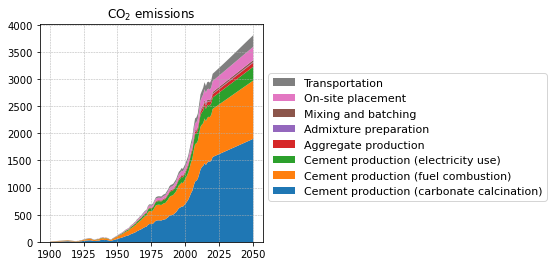

In [4]:
ax=CO2_matrix.plot.area(figsize=(4, 4),lw=0)
ax.set_title("CO$_2$ emissions")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='upper left',bbox_to_anchor=(1, 0.8),fontsize=11)
ax.grid(linewidth=0.5,linestyle = "--")

# Future scenarios (2020-2050)

In [5]:
Data = pd.read_excel (io = r'Data_input.xlsx', sheet_name="Input_base",nrows=151)
Data_ME = pd.read_excel (io = r'Data_input.xlsx', sheet_name="Input_ME",nrows=151)

lever_list = {
    # baseline
    'BASE': [],
    
    # material-efficient design
    'ME'  : ["Res concrete intensity",
             "NonR concrete intensity",
             "Civ concrete intensity",
             "Cement content of concrete"],
    
    # fabrication yield improvement
    'FYI':  ["Construction yield"],
    
    # more intensive use
    'MIU':  ["Res concrete stock",
             "NonR concrete stock",
             "Civ concrete stock",
             "Res mortar stock",
             "NonR mortar stock",
             "Civ mortar stock"],
    
    # lifetime extention
    'LTE':  ["Res life","NonR life","Civ life"],
    
    # component reuse
    'REU':  ["Reuse rate"],
    
    # downcycling
    'REC':  ["Recycling rate","Downcycling rate"]
    }

lever_list_story = {
    'BASE':lever_list['BASE'],
    'ME'  :lever_list['BASE']+lever_list['ME'],
    'FYI' :lever_list['BASE']+lever_list['ME']+lever_list['FYI'],
    'MIU' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU'],
    'LTE' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU']+lever_list['LTE'],
    'REU' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU']+lever_list['LTE']+lever_list['REU'],
    'REC' :lever_list['BASE']+lever_list['ME']+lever_list['FYI']+lever_list['MIU']+lever_list['LTE']+lever_list['REU']+lever_list['REC'],
        }
    
print("levers include " + str(lever_list_story.keys()))

for scenario_index in lever_list_story:
    scenarios = lever_list_story[scenario_index]

    if len(scenarios)>0:
        print("Implementing Scenario" + str(scenarios))
        for i in range(0,len(scenarios)):
            Data[scenarios[i]] = Data_ME[scenarios[i]]
    else:
        print("Implementing Base scenario")
    
    # inflow matrix
    in_func_con_matrix = pd.DataFrame()
    in_func_con_matrix = pd.concat([Data["Res concrete inflow"].dropna(),
                                    Data["NonR concrete inflow"].dropna(),
                                    Data["Civ concrete inflow"].dropna(),],axis=1)
    in_func_mor_matrix = pd.DataFrame()
    in_func_mor_matrix = pd.concat([Data["Res mortar inflow"].dropna(),
                                    Data["NonR mortar inflow"].dropna(),
                                    Data["Civ mortar inflow"].dropna(),],axis=1)
    
    # outflow matrix
    ot_con_matrix = pd.DataFrame()
    ot_con_matrix = pd.concat([Data["Res concrete outflow"].dropna(),
                               Data["NonR concrete outflow"].dropna(),
                               Data["Civ concrete outflow"].dropna(),],axis=1)
    ot_mor_matrix = pd.DataFrame()
    ot_mor_matrix = pd.concat([Data["Res mortar outflow"].dropna(),
                               Data["NonR mortar outflow"].dropna(),
                               Data["Civ mortar outflow"].dropna(),],axis=1)
    
    # stock matrix
    st_func_con_matrix= pd.DataFrame()
    st_func_con_matrix = pd.concat([Data["Res concrete stock"],Data["NonR concrete stock"],Data["Civ concrete stock"]],axis=1)
    st_func_mor_matrix = pd.DataFrame()
    st_func_mor_matrix = pd.concat([Data["Res mortar stock"],Data["NonR mortar stock"],Data["Civ mortar stock"]],axis=1)
    
    # lifetime matrix
    life_matrix = pd.DataFrame()
    life_matrix = pd.concat([Data["Res life"],Data["NonR life"],Data["Civ life"]],axis=1)
    
    # material intensity matrix
    MI_con_matrix = pd.DataFrame()
    MI_con_matrix = pd.concat([Data["Res concrete intensity"],
                               Data["NonR concrete intensity"],
                               Data["Civ concrete intensity"]],axis=1)
    
    MI_mor_matrix = pd.DataFrame()
    MI_mor_matrix = pd.concat([Data["Res mortar intensity"],
                               Data["NonR mortar intensity"],
                               Data["Civ mortar intensity"]],axis=1)
    
    ##############################################################################
    # stock-driven model
    ##############################################################################
    
    in_con_matrix = pd.DataFrame()
    in_mor_matrix = pd.DataFrame()
    
    for i in range(0,len(in_func_con_matrix.columns)):
        year_complete = np.arange(1900,2021)
        in_func_con_extended = in_func_con_matrix.iloc[:,i]
        in_func_mor_extended = in_func_mor_matrix.iloc[:,i]
        ot_con_extended = ot_con_matrix.iloc[:,i]
        ot_mor_extended = ot_mor_matrix.iloc[:,i]
        ot_con_extended = np.repeat(0,len(year_complete))
        ot_mor_extended = np.repeat(0,len(year_complete))
    
        for k in range(2021,2051):
            life_extended   = life_matrix.iloc[0:len(year_complete),i]
            MI_con = MI_con_matrix.iloc[0:len(year_complete),i]
            MI_mor = MI_mor_matrix.iloc[0:len(year_complete),i]
            
            # function outflow
            ot_func_con_list = in_func_con_extended * (norm.pdf(k-year_complete,life_extended,life_extended*0.28))
            ot_func_con      = sum(ot_func_con_list)
            ot_func_mor_list = in_func_mor_extended * (norm.pdf(k-year_complete,life_extended,life_extended*0.28))
            ot_func_mor      = sum(ot_func_mor_list)
            
            # material outflow            
            ot_con_list = (in_func_con_extended * MI_con) * (norm.pdf(k-year_complete,life_extended,life_extended*0.28))
            ot_con      = sum(ot_con_list)
            ot_con_extended = np.append(ot_con_extended,ot_con)
            ot_mor_list = (in_func_mor_extended * MI_mor) * (norm.pdf(k-year_complete,life_extended,life_extended*0.28))
            ot_mor      = sum(ot_mor_list)
            ot_mor_extended = np.append(ot_mor_extended,ot_mor)
            
            # function inflow
            in_func_con = st_func_con_matrix.iloc[k-1900,i] - st_func_con_matrix.iloc[k-1901,i] + ot_func_con
            in_func_con_extended = np.append(in_func_con_extended, in_func_con)
            in_func_mor = st_func_mor_matrix.iloc[k-1900,i] - st_func_mor_matrix.iloc[k-1901,i] + ot_func_mor
            in_func_mor_extended = np.append(in_func_mor_extended, in_func_mor)
            
            year_complete = np.append(year_complete,k)
        
        # material inflow matrix
        in_con = in_func_con_extended * MI_con_matrix.iloc[:,i]
        in_con_matrix = pd.concat([in_con_matrix, pd.Series(in_con)], axis = 1, ignore_index = True)
        in_mor = in_func_mor_extended * MI_mor_matrix.iloc[:,i]
        in_mor_matrix = pd.concat([in_mor_matrix, pd.Series(in_mor)], axis = 1, ignore_index = True)
        
        # material outflow matrix
        ot_con_matrix = pd.concat([ot_con_matrix, pd.Series(ot_con_extended)], axis = 1, ignore_index = True)
        ot_mor_matrix = pd.concat([ot_mor_matrix, pd.Series(ot_mor_extended)], axis = 1, ignore_index = True)
        
    ot_con_matrix=pd.concat([ot_con_matrix.fillna(0)[x]+ot_con_matrix[y] 
                             for x,y in zip(range(0,3),range(3,6))], axis = 1)
    ot_mor_matrix=pd.concat([ot_mor_matrix.fillna(0)[x]+ot_mor_matrix[y] 
                             for x,y in zip(range(0,3),range(3,6))], axis = 1)
    
    NAS_con_matrix = in_con_matrix - ot_con_matrix
    NAS_mor_matrix = in_mor_matrix - ot_mor_matrix
    st_con_matrix  = NAS_con_matrix.cumsum()
    st_mor_matrix  = NAS_mor_matrix.cumsum()
    
    in_con_matrix = in_con_matrix.rename(columns={0:"Residential buildings",
                                                  1:"Non-residential buildings",
                                                  2:"Civil engineering"})                   
    ot_con_matrix = ot_con_matrix.rename(columns={0:"Residential buildings",
                                                  1:"Non-residential buildings",
                                                  2:"Civil engineering"})
    st_con_matrix = st_con_matrix.rename(columns={0:"Residential buildings",
                                                  1:"Non-residential buildings",
                                                  2:"Civil engineering"})
    
    in_mor_matrix = in_mor_matrix.rename(columns={0:"Residential buildings",
                                                  1:"Non-residential buildings",
                                                  2:"Civil engineering"})
    ot_mor_matrix = ot_mor_matrix.rename(columns={0:"Residential buildings",
                                                  1:"Non-residential buildings",
                                                  2:"Civil engineering"})
    st_mor_matrix = st_mor_matrix.rename(columns={0:"Residential buildings",
                                                  1:"Non-residential buildings",
                                                  2:"Civil engineering"})
    
    # sum
    in_total_matrix = in_con_matrix + in_mor_matrix
    ot_total_matrix = ot_con_matrix + ot_mor_matrix
    st_total_matrix = st_con_matrix + st_mor_matrix

    in_con_total = in_con_matrix.sum(axis=1)
    ot_con_total = ot_con_matrix.sum(axis=1)
    st_con_total = st_con_matrix.sum(axis=1)
    in_mor_total = in_mor_matrix.sum(axis=1)
    ot_mor_total = ot_mor_matrix.sum(axis=1)
    st_mor_total = st_mor_matrix.sum(axis=1)

    in_total = in_con_total + in_mor_total
    ot_total = ot_con_total + ot_mor_total
    st_total = st_con_total + st_mor_total

    # eol management
    rec   = ot_total * Data["Recycling rate"]
    down  = ot_total * Data["Downcycling rate"]
    hiber = ot_total * Data["Hibernating stock rate"]
    reuse_Res  = ot_con_matrix["Residential buildings"]*Data["Reuse rate"]
    reuse_NonR = ot_con_matrix["Non-residential buildings"]*Data["Reuse rate"]
    reuse = reuse_Res + reuse_NonR
    land  = ot_total - rec - down - hiber - reuse
    EoL_mix = pd.DataFrame()
    EoL_mix = pd.concat([rec,down,hiber,land,reuse],axis=1)
    EoL_mix = EoL_mix.rename(columns={0:"Recycling",1:"Downcycling",2:"Hibernating stock",3:"Landfill",4:"Reuse"})
    
    # concrete and mortar production
    pro_con = (in_con_total/Data["Construction yield"]) - reuse
    pro_mor = (in_mor_total/Data["Construction yield"])
    production_mix = pd.DataFrame()
    production_mix = pd.concat([pro_con,pro_mor],axis=1)
    production_mix = production_mix.rename(columns={0:"Concrete",1:"Mortar"})
    
    # construction loss
    concrete_loss = pro_con + reuse - in_con_total
    mortar_loss   = pro_mor - in_mor_total
    conloss_mix = pd.DataFrame()
    conloss_mix = pd.concat([concrete_loss,mortar_loss],axis=1)
    conloss_mix = conloss_mix.rename(columns={0:"Concrete loss",1:"Mortar loss"})
    
    # concrete mixture
    cement_con = pro_con * Data["Cement content of concrete"]
    water_con  = pro_con * Data["Water content of concrete"]
    fine_con   = pro_con * Data["Fine aggregates content of concrete"]
    coarse_con = pro_con * Data["Coarse aggregates content of concrete"]
    slag_con   = pro_con * Data["Slag content of concrete"]
    ash_con    = pro_con * Data["Fly ash content of concrete"]
    concrete_mix = pd.DataFrame()
    concrete_mix = pd.concat([cement_con,water_con,fine_con,coarse_con,slag_con,ash_con],axis=1)
    concrete_mix = concrete_mix.rename(columns={0:"Cement",1:"Water",2:"Fine aggregates",
                                                3:"Coarse aggregates",4:"Slag",5:"Fly ash"})
    
    # mortar mixture
    cement_mor = pro_mor * Data["Cement content of mortar"]
    water_mor  = pro_mor * Data["Water content of mortar"]
    fine_mor   = pro_mor * Data["Fine aggregates content of mortar"]
    coarse_mor = pro_mor * Data["Coarse aggregates content of mortar"]
    slag_mor   = pro_mor * Data["Slag content of mortar"]
    ash_mor    = pro_mor * Data["Fly ash content of mortar"]
    mortar_mix = pd.DataFrame()
    mortar_mix = pd.concat([cement_mor,water_mor,fine_mor,coarse_mor,slag_mor,ash_mor],axis=1)
    mortar_mix = mortar_mix.rename(columns={0:"Cement",1:"Water",2:"Fine aggregates",
                                            3:"Coarse aggregates",4:"Slag",5:"Fly ash"})
    
    # cement mixture
    cement_pro  = cement_con + cement_mor
    clinker_cem = cement_pro * Data["Clinker ratio"]
    gypsum_cem  = cement_pro * Data["Gypsum ratio"]
    slag_cem    = cement_pro * Data["Slag ratio"]
    ash_cem     = cement_pro * Data["Fly ash ratio"]
    lime_cem    = cement_pro * Data["Limestone ratio"]
    pozzo_cem   = cement_pro * Data["Natural pozzolana ratio"]
    cement_mix  = pd.DataFrame()
    cement_mix  = pd.concat([clinker_cem,gypsum_cem,slag_cem,ash_cem,lime_cem,pozzo_cem],axis=1)
    cement_mix  = cement_mix.rename(columns={0:"Clinker",1:"Gypsum",2:"Slag",3:"Fly ash",
                                             4:"Limestone",5:"Pozzolana"})
    
    # ckd
    CKD      = clinker_cem * Data["CKD generation rate"]
    land_CKD = CKD * Data["Proportion of landfilled CKD"]
    CKD_mix  = pd.DataFrame()
    CKD_mix  = pd.concat([CKD,land_CKD],axis=1)
    CKD_mix  = CKD_mix.rename(columns={0:"CKD generation",1:"Landfilled CKD"})
    
    # manufacturing loss
    fine_con_loss   = fine_con   / Data["Manufacturing yield"] - fine_con
    coarse_con_loss = coarse_con / Data["Manufacturing yield"] - coarse_con
    fine_mor_loss   = fine_mor   / Data["Manufacturing yield"] - fine_mor
    manloss_mix = pd.DataFrame()
    manloss_mix = pd.concat([fine_con_loss,coarse_con_loss,fine_mor_loss],axis=1)
    manloss_mix = manloss_mix.rename(columns={0:"Fine aggregate loss in concrete manufacturing",
                                              1:"Coarse aggregate loss in concrete manufacturing",
                                              2:"Fine aggregate loss in mortar manufacturing"})
    
    # total aggregate production
    pro_fine_con   = fine_con + fine_con_loss
    pro_coarse_con = coarse_con + coarse_con_loss
    pro_fine_mor   = fine_mor + fine_mor_loss
    
    # natural aggregate production
    pro_fine_nat   = pro_fine_con + pro_fine_mor - (rec/2)
    pro_coarse_nat = pro_coarse_con - (rec/2)
    aggregate_mix = pd.DataFrame()
    aggregate_mix = pd.concat([pro_fine_nat,pro_coarse_nat,rec],axis=1)
    aggregate_mix = aggregate_mix.rename(columns={0:"Virgin fine aggregate production",
                                                  1:"Virgin coarse aggregate production",
                                                  2:"Recycled aggregate production"})
    
    # co2 emissions
    cem_process  = clinker_cem * Data["Process emission factor"]
    cem_thermal  = clinker_cem * Data["Thermal energy"] * Data["Carbon intensity of the fuel mix"]
    cem_electric = cement_pro  * Data["Electricity for cement"] * Data["Electricity emission factor"]
    agg_pro      = (pro_fine_nat+pro_coarse_nat+rec) * Data["Emission factor for aggregate production"]
    slag_pre     = (slag_con + slag_mor) * Data["Electricity for slag"] * Data["Electricity emission factor"]
    ash_pre      = (ash_con + ash_mor) * Data["Electricity for fly ash"] * Data["Electricity emission factor"]
    adm_pre      = slag_pre + ash_pre
    mixing       = (pro_con + pro_mor) * Data["Emission factor for mixing and batching"]
    onsite       = (pro_con + pro_mor) * Data["Emission factor for on-site placement"]
    tra_cem      = cement_pro * Data["Transportation of cement"]
    tra_adm      = (slag_con + slag_mor + ash_con + ash_mor) * Data["Transportation of mineral admixtures"]
    tra_agg_nat  = (pro_fine_nat+pro_coarse_nat) * Data["Transportation of virgin aggregate"]
    tra_agg_land = land * Data["Transportation of buried aggregate"]
    tra_agg_rec  = rec * Data["Transportation of recycled aggregate"]
    tra_total    = tra_cem+tra_adm+tra_agg_nat+tra_agg_land+tra_agg_rec

    CO2_matrix = pd.DataFrame()
    CO2_matrix = pd.concat([cem_process,cem_thermal,cem_electric,agg_pro,adm_pre,mixing,onsite,tra_total],axis=1)
    CO2_matrix = CO2_matrix.rename(columns={0:"Cement production (carbonate calcination)",
                                            1:"Cement production (fuel combustion)",
                                            2:"Cement production (electricity use)",
                                            3:"Aggregate production",
                                            4:"Admixture preparation",
                                            5:"Mixing and batching",
                                            6:"On-site placement",
                                            7:"Transportation"})

    cement_mix     = cement_mix.rename(index=Data["Year"])
    CKD_mix        = CKD_mix.rename(index=Data["Year"])
    concrete_mix   = concrete_mix.rename(index=Data["Year"])
    mortar_mix     = mortar_mix.rename(index=Data["Year"])
    manloss_mix    = manloss_mix.rename(index=Data["Year"])
    aggregate_mix  = aggregate_mix.rename(index=Data["Year"])
    production_mix = production_mix.rename(index=Data["Year"])
    conloss_mix    = conloss_mix.rename(index=Data["Year"])
    in_con_matrix  = in_con_matrix.rename(index=Data["Year"])
    in_mor_matrix  = in_mor_matrix.rename(index=Data["Year"])
    ot_con_matrix  = ot_con_matrix.rename(index=Data["Year"])
    ot_mor_matrix  = ot_mor_matrix.rename(index=Data["Year"])
    st_con_matrix  = st_con_matrix.rename(index=Data["Year"])
    st_mor_matrix  = st_mor_matrix.rename(index=Data["Year"])
    in_total_matrix = in_total_matrix.rename(index=Data["Year"])
    ot_total_matrix = ot_total_matrix.rename(index=Data["Year"])
    st_total_matrix = st_total_matrix.rename(index=Data["Year"])
    EoL_mix = EoL_mix.rename(index=Data["Year"])
    CO2_matrix = CO2_matrix.rename(index=Data["Year"])
    
    with pd.ExcelWriter('Results'+'/Strategy_'+str(scenario_index) + '.xlsx') as writer:
        cement_mix.to_excel(writer, sheet_name='Cement')
        CKD_mix.to_excel(writer, sheet_name='CKD')
        concrete_mix.to_excel(writer, sheet_name='Concrete')
        mortar_mix.to_excel(writer, sheet_name='Mortar')
        manloss_mix.to_excel(writer, sheet_name='Manloss')
        aggregate_mix.to_excel(writer, sheet_name='Aggregate')
        production_mix.to_excel(writer, sheet_name='Production')
        conloss_mix.to_excel(writer, sheet_name='Conloss')
        in_con_matrix.to_excel(writer, sheet_name='Inflow_con')
        in_mor_matrix.to_excel(writer, sheet_name='Inflow_mor')
        ot_con_matrix.to_excel(writer, sheet_name='Outflow_con')
        ot_mor_matrix.to_excel(writer, sheet_name='Outflow_mor')
        st_con_matrix.to_excel(writer, sheet_name='Stock_con')
        st_mor_matrix.to_excel(writer, sheet_name='Stock_mor')
        in_total_matrix.to_excel(writer, sheet_name='Inflow_total')
        ot_total_matrix.to_excel(writer, sheet_name='Outflow_total')
        st_total_matrix.to_excel(writer, sheet_name='Stock_total')
        EoL_mix.to_excel(writer, sheet_name='EoL')
        CO2_matrix.to_excel(writer, sheet_name='CO2')

levers include dict_keys(['BASE', 'ME', 'FYI', 'MIU', 'LTE', 'REU', 'REC'])
Implementing Base scenario
Implementing Scenario['Res concrete intensity', 'NonR concrete intensity', 'Civ concrete intensity', 'Cement content of concrete']
Implementing Scenario['Res concrete intensity', 'NonR concrete intensity', 'Civ concrete intensity', 'Cement content of concrete', 'Construction yield']
Implementing Scenario['Res concrete intensity', 'NonR concrete intensity', 'Civ concrete intensity', 'Cement content of concrete', 'Construction yield', 'Res concrete stock', 'NonR concrete stock', 'Civ concrete stock', 'Res mortar stock', 'NonR mortar stock', 'Civ mortar stock']
Implementing Scenario['Res concrete intensity', 'NonR concrete intensity', 'Civ concrete intensity', 'Cement content of concrete', 'Construction yield', 'Res concrete stock', 'NonR concrete stock', 'Civ concrete stock', 'Res mortar stock', 'NonR mortar stock', 'Civ mortar stock', 'Res life', 'NonR life', 'Civ life']
Implementing S

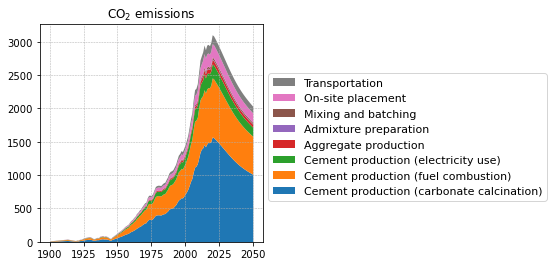

In [6]:
ax=CO2_matrix.plot.area(figsize=(4, 4),lw=0)
ax.set_title("CO$_2$ emissions")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='upper left',bbox_to_anchor=(1, 0.8),fontsize=11)
ax.grid(linewidth=0.5,linestyle = "--")